In [ ]:
'''

INTRODUCTION:

The data frame on diabetes includes age, gender, blood glucose level, and BMI, which can be useful for research on diabetes prevalence 
and risk factors, aiding in diagnosis and treatment planning, and assessing individual risk profiles for preventive measures.
Additionally, the data frame can contribute to the development of targeted interventions and strategies to combat the growing burden of 
diabetes on public health.

OBJECTIVE:

The primary objective is to study the relationship of Diabetes with various different factors and analyze if they have
a positive, negative or neutral impact on Diabetic patients. Some of the factors include:
1. Age
2. BMI
3. Gender
4. Blood Glucose level
5. Heart diseases
6. HbA1c level
7. Smoking history 

DATA SET USED:

diabetes_prediction_dataset.csv

SOURCE :- Kaggle
link :- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("diabetes_prediction_dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [2]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
# 1st Querie 
# Finding the percentage of Diabetic people in the Sample
a=df['diabetes'].value_counts()[1]
print("The percentage of Diabetic people in the sample are: ", (a/100000)*100, "%")

The percentage of Diabetic people in the sample are:  8.5 %


In [5]:
# 2nd Querie
# Finding the percentage of male and female Diabetic people diabetic
total_males=df['gender'].value_counts()['Male']
total_females=df['gender'].value_counts()['Female']
diabetic_males=len(df[(df['gender'] == 'Male') & (df['diabetes'] == 1)])
diabetic_females=len(df[(df['gender'] == 'Female') & (df['diabetes'] == 1)])
print("Percentage of diabetic males in the sample: ", round((diabetic_males/total_males)*100,2),"%")
print("Percentage of diabetic females in the sample: ", round((diabetic_females/total_females)*100,2),"%")

Percentage of diabetic males in the sample:  9.75 %
Percentage of diabetic females in the sample:  7.62 %


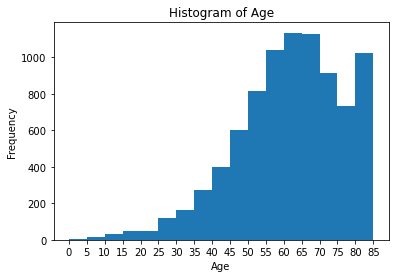

In [6]:
# 3rd Querie
# Making a bar chat to find a possible relation between age and Diabetes
df['age'] = df['age'].astype(int)
diabetic_ages = df[df['diabetes'] == 1]['age']
age_intervals = range(df['age'].min(), df['age'].max() + 6, 5)
plt.hist(diabetic_ages, bins=age_intervals)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.xticks(age_intervals)
plt.show()

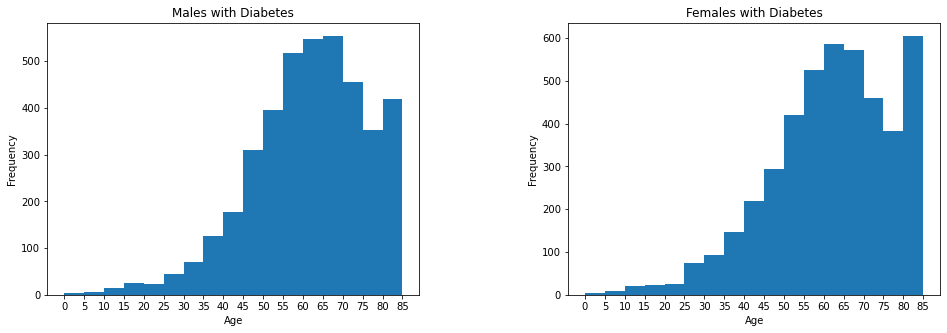

In [7]:
# 4th Querie
# Making different plots for makes and females to find if there is any difference in males and female
# diabetic patients according to age
df['age'] = df['age'].astype(int)
diabetic_ages_male = df[(df['diabetes'] == 1) & (df['gender']=='Male')]['age']
age_intervals = range(df['age'].min(), df['age'].max() + 6, 5)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].hist(diabetic_ages_male, bins=age_intervals)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Males with Diabetes')
axs[0].set_xticks(age_intervals)


diabetic_ages_female = df[(df['diabetes'] == 1) & (df['gender']=='Female')]['age']
axs[1].hist(diabetic_ages_female, bins=age_intervals)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Females with Diabetes')
axs[1].set_xticks(age_intervals)

plt.subplots_adjust(wspace=0.4)
plt.show()


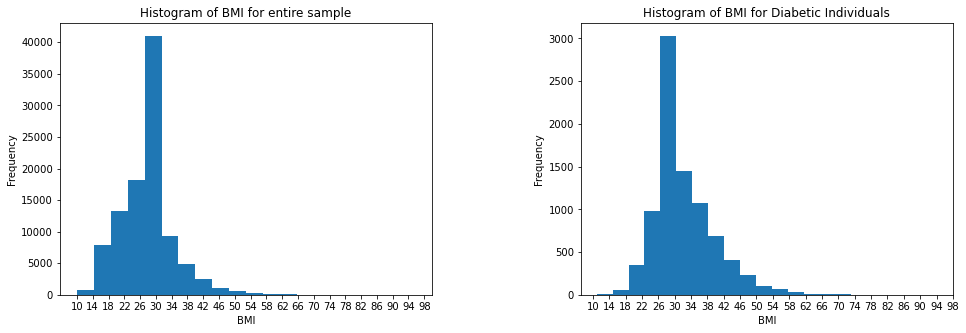

In [8]:
# 5th Querie
# Making a bar chat to find a possible relation between BMI and Diabetes
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
bmi_intervals = range(int(df['bmi'].min()), int(df['bmi'].max()) + 6, 4)
axs[0].hist(df['bmi'], bins=20)
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of BMI for entire sample')
axs[0].set_xticks(bmi_intervals)

diabetic_bmi = df[df['diabetes'] == 1]['bmi']
plt.hist(diabetic_bmi, bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')`
plt.title('Histogram of BMI for Diabetic Individuals')
axs[1].set_xticks(bmi_intervals)

plt.subplots_adjust(wspace=0.4)
plt.show()

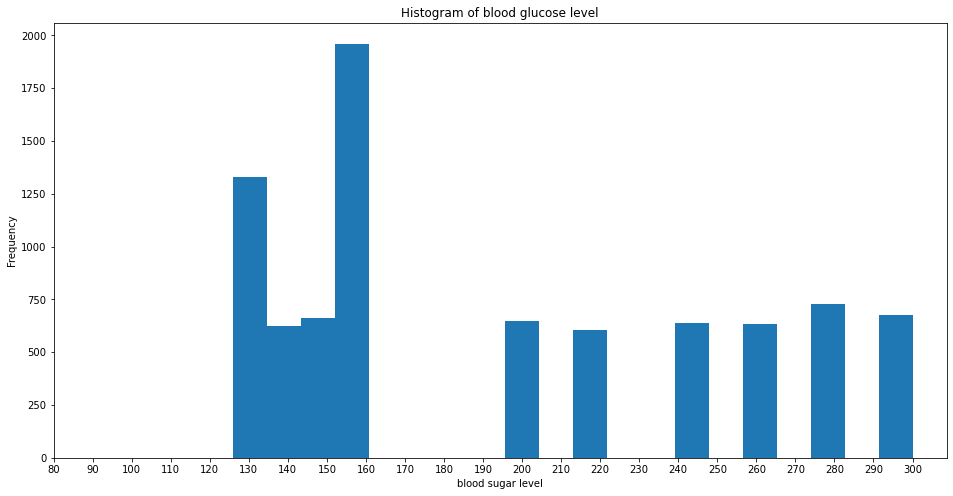

In [9]:
# 6th Querie
# Making a bar chat to find a possible relation between blood glucose level and Diabetes
df['blood_glucose_level'] = df['blood_glucose_level'].astype(int)
diabetic_bgl = df[df['diabetes'] == 1]['blood_glucose_level']
plt.figure(figsize=(16, 8))

bgl_intervals = range(df['blood_glucose_level'].min(), df['blood_glucose_level'].max() + 6, 10)
plt.hist(diabetic_bgl, bins=20)
plt.xlabel('blood sugar level')
plt.ylabel('Frequency')
plt.title('Histogram of blood glucose level')
plt.xticks(bgl_intervals)
plt.show()

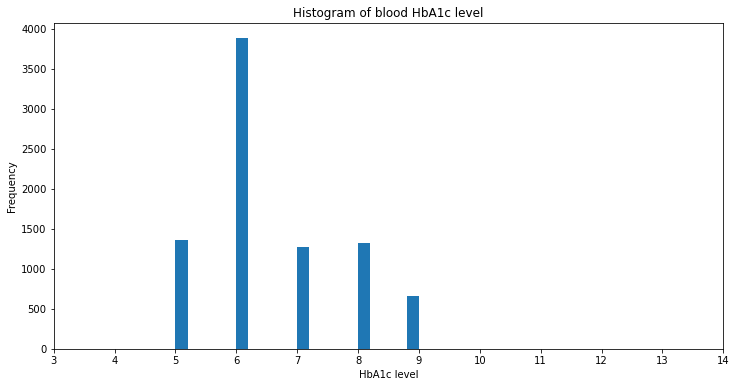

In [10]:
# 7th Querie
# Making a bar chat to find a possible relation between HbA1c level and Diabetes
df['HbA1c_level'] = df['HbA1c_level'].astype(int)
diabetic_bgl = df[df['diabetes'] == 1]['HbA1c_level']
plt.figure(figsize=(12, 6))

hba_intervals = range(int(df['HbA1c_level'].min()), int(df['HbA1c_level'].max()) + 6, 1)
plt.hist(diabetic_bgl, 20)
plt.xlabel('HbA1c level')
plt.ylabel('Frequency')
plt.title('Histogram of blood HbA1c level')
plt.xticks(hba_intervals)
plt.show()

In [11]:
# 8th Querie
# Counting number of smokers, non-smokers, former smokers in sample
smoker=df['smoking_history'].value_counts()['current']
non_smoker=df['smoking_history'].value_counts()['never']
former=df['smoking_history'].value_counts()['former']
no_info=df['smoking_history'].value_counts()['No Info']

print(" CURRENT SMOKERS: ", smoker)
print(" NON SMOKERS: ", non_smoker)
print(" FORMER SMOKERS: ", former)
print(" NO INFO: ", no_info)

 CURRENT SMOKERS:  9286
 NON SMOKERS:  35095
 FORMER SMOKERS:  9352
 NO INFO:  35816


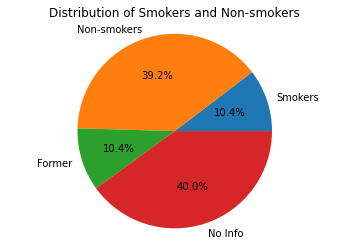

In [12]:
# 9th Querie
# Making a Pie chart to show shed light on smoking history of population
labels = ['Smokers', 'Non-smokers', 'Former', 'No Info']
smoker=df['smoking_history'].value_counts()['current']
non_smoker=df['smoking_history'].value_counts()['never']
former=df['smoking_history'].value_counts()['former']
no_info=df['smoking_history'].value_counts()['No Info']
sizes = [smoker,non_smoker,former,no_info]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribution of Smokers and Non-smokers')
plt.show()

In [13]:
# 10th Querie
# Counting number of smokers, non-smokers, former smokers in sample who are diabetic
diabetic_smoker=len(df[(df['smoking_history'] == 'current') & (df['diabetes'] == 1)])
diabetic_non_smoker=len(df[(df['smoking_history'] == 'never') & (df['diabetes'] == 1)])
diabetic_former_smoker=len(df[(df['smoking_history'] == 'former') & (df['diabetes'] == 1)])
diabetic_no_info=len(df[(df['smoking_history'] == 'No Info') & (df['diabetes'] == 1)])

print(" CURRENT SMOKERS: ", diabetic_smoker)
print(" NON SMOKERS: ", diabetic_non_smoker)
print(" FORMER SMOKERS: ", diabetic_former_smoker)
print(" NO INFO: ", diabetic_no_info)

 CURRENT SMOKERS:  948
 NON SMOKERS:  3346
 FORMER SMOKERS:  1590
 NO INFO:  1454


In [14]:
# 11th querie
# Finding percentage of people who are diabetic and are current, former and non smoker

print("Percentage of diabetic smokers in Sample: ", round(diabetic_smoker*100/smoker,2),"%")
print("Percentage of diabetic non smokers in Sample: ", round(diabetic_non_smoker*100/non_smoker,2),"%")
print("Percentage of diabetic former smoker in Sample: ", round(diabetic_former_smoker*100/former,2),"%")

Percentage of diabetic smokers in Sample:  10.21 %
Percentage of diabetic non smokers in Sample:  9.53 %
Percentage of diabetic former smoker in Sample:  17.0 %


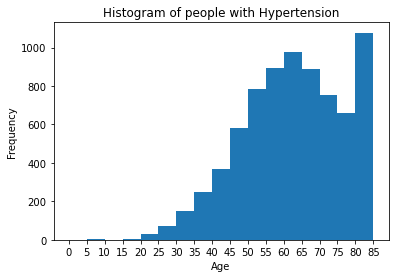

In [15]:
# 12th Querie
# Making a bar chat to find a possible relation between age and hypertention
df['age'] = df['age'].astype(int)
hypertension_ages = df[df['hypertension'] == 1]['age']
age_intervals = range(df['age'].min(), df['age'].max() + 6, 5)
plt.hist(hypertension_ages, bins=age_intervals)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of people with Hypertension')
plt.xticks(age_intervals)
plt.show()

In [16]:
# 13th Querie
# counting number of people with diabetes and hypertension 
diabetic_hypertension=len(df[(df['hypertension'] == 1) & (df['diabetes'] == 1)])
diabetic_non_hypertension=len(df[(df['hypertension'] == 0) & (df['diabetes'] == 1)])

print(" PEOPLE WITH HYPERTENSION AND DIABETES : ", diabetic_hypertension)
print(" PEOPLE WITH DIABETES BUT NO HYPERTENSION: ", diabetic_non_hypertension)


 PEOPLE WITH HYPERTENSION AND DIABETES :  2088
 PEOPLE WITH DIABETES BUT NO HYPERTENSION:  6412


In [17]:
# 14th querie
# filtering based on conditions for diabetic people like age>40

filtered_diabetic = df[(df['diabetes'] == 1) & (df['age'] > 40)]
print(filtered_diabetic.head())

    gender  age  hypertension  heart_disease smoking_history    bmi  \
6   Female   44             0              0           never  19.31   
26    Male   67             0              1     not current  27.32   
38    Male   50             1              0         current  27.32   
40    Male   73             0              0          former  25.91   
53  Female   53             0              0          former  27.32   

    HbA1c_level  blood_glucose_level  diabetes  
6             6                  200         1  
26            6                  200         1  
38            5                  260         1  
40            9                  160         1  
53            7                  159         1  


In [18]:
# 15th querie
# filtering based on conditions for diabetic people like bmi>20

filtered_diabetic_bmi = df[(df['diabetes'] == 1) & (df['bmi'] > 20)]
print(filtered_diabetic_bmi.head())

    gender  age  hypertension  heart_disease smoking_history    bmi  \
26    Male   67             0              1     not current  27.32   
38    Male   50             1              0         current  27.32   
40    Male   73             0              0          former  25.91   
53  Female   53             0              0          former  27.32   
55    Male   50             0              0          former  37.16   

    HbA1c_level  blood_glucose_level  diabetes  
26            6                  200         1  
38            5                  260         1  
40            9                  160         1  
53            7                  159         1  
55            9                  159         1  


In [19]:
# 16th querie
# finding statistics of people with diabetes
# Like mean, variance and standard deviation of age of people with diabetes

mean_value_age = df[(df['diabetes'] == 1)]['age'].mean()
variance_value_age =df[(df['diabetes'] == 1)]['age'].var()
std_dev_value_age = df[(df['diabetes'] == 1)]['age'].std()

print("Mean age of people with diabetes:", round(mean_value_age,2))
print("Variance of ages of people with diabetes:", round(variance_value_age,2))
print("Standard Deviation of ages of people with diabetes:", round(std_dev_value_age,2))

Mean age of people with diabetes: 60.95
Variance of ages of people with diabetes: 211.7
Standard Deviation of ages of people with diabetes: 14.55


In [20]:
# 17th querie
# finding statistics of people with diabetes
# Like mean, variance and standard deviation of BMI of people with diabetes

mean_value_age = df[(df['diabetes'] == 1)]['bmi'].mean()
variance_value_age =df[(df['diabetes'] == 1)]['bmi'].var()
std_dev_value_age = df[(df['diabetes'] == 1)]['bmi'].std()

print("Mean BMI of people with diabetes:", round(mean_value_age,2))
print("Variance of BMI of people with diabetes:", round(variance_value_age,2))
print("Standard Deviation of BMI of people with diabetes:", round(std_dev_value_age,2))

Mean BMI of people with diabetes: 31.99
Variance of BMI of people with diabetes: 57.13
Standard Deviation of BMI of people with diabetes: 7.56


In [21]:
# 18th Querie 
# Finding correlation between HbA1c_level and blood_gulcose_level of diabetic people in sample

correlation = df[df['diabetes'] == 1][['HbA1c_level', 'blood_glucose_level']].corr()
print(correlation)

                     HbA1c_level  blood_glucose_level
HbA1c_level             1.000000            -0.006234
blood_glucose_level    -0.006234             1.000000


In [22]:
# 19th Querie 
# Finding correlation between heart disease and diabetes of diabetic people in sample

correlation_matrix = df[['heart_disease', 'diabetes']].corr()
print(correlation_matrix)

               heart_disease  diabetes
heart_disease       1.000000  0.171727
diabetes            0.171727  1.000000


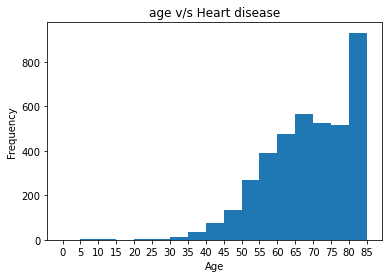

In [23]:
# 20th querie 
# Making a bar chat to find a possible relation between age and Heart Disease
df['age'] = df['age'].astype(int)
diabetic_ages = df[df['heart_disease'] == 1]['age']
age_intervals = range(df['age'].min(), df['age'].max() + 6, 5)
plt.hist(diabetic_ages, bins=age_intervals)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('age v/s Heart disease')
plt.xticks(age_intervals)
plt.show()

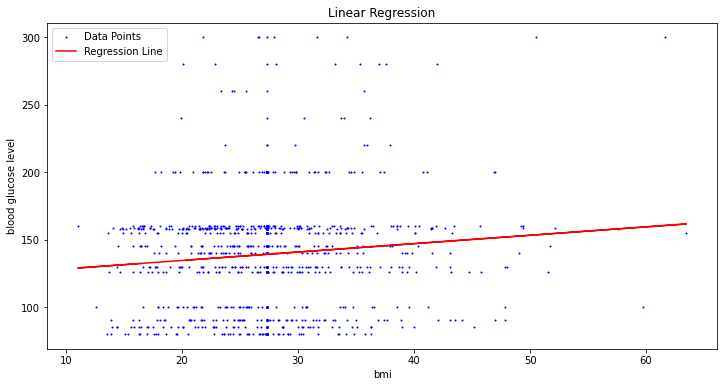

In [24]:
# 21st Querie 
# using regression to find possible relation between bmi and blood glucose level
subset_df = df.sample(n=1000, random_state=25)
slope, intercept, r_value, p_value, std_err = stats.linregress(subset_df['bmi'], subset_df['blood_glucose_level'])
plt.figure(figsize=(12, 6))
plt.scatter(subset_df['bmi'], subset_df['blood_glucose_level'], color='blue', label='Data Points',s=1)
plt.plot(subset_df['bmi'], intercept + slope * subset_df['bmi'], color='red', label='Regression Line')
plt.xlabel('bmi')
plt.ylabel('blood glucose level')
plt.title('Linear Regression')
plt.legend()
plt.show()

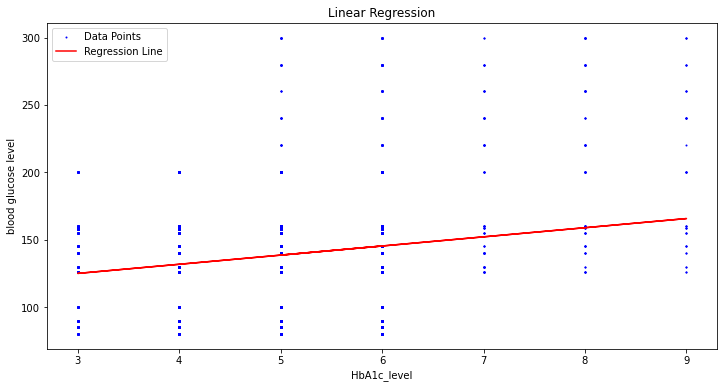

In [25]:
# 22nd Querie 
# using regression to find possible relation between HbA1c level and blood glucose level
subset_df = df.sample(n=5000, random_state=25)
slope, intercept, r_value, p_value, std_err = stats.linregress(subset_df['HbA1c_level'], subset_df['blood_glucose_level'])
plt.figure(figsize=(12, 6))
plt.scatter(subset_df['HbA1c_level'], subset_df['blood_glucose_level'], color='blue', label='Data Points',s=1)
plt.plot(subset_df['HbA1c_level'], intercept + slope * subset_df['HbA1c_level'], color='red', label='Regression Line')
plt.xlabel('HbA1c_level')
plt.ylabel('blood glucose level')
plt.title('Linear Regression')
plt.legend()
plt.show()

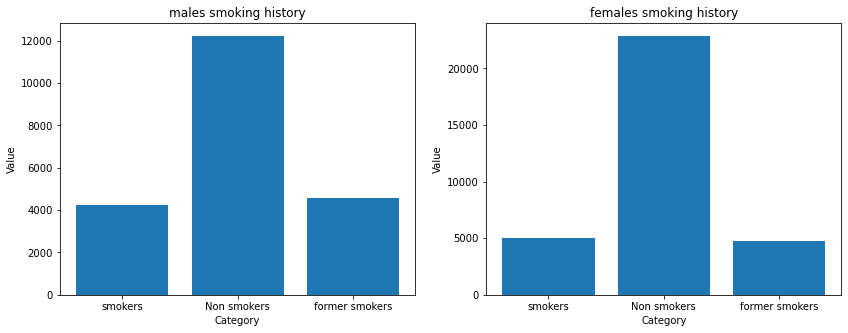

In [26]:
# 23rd QUerie
# Making Bar char to evaluate differences in smoking history between males and females

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
x=df[df['gender']=='Male']['smoking_history'].value_counts()['current']
y=df[df['gender']=='Male']['smoking_history'].value_counts()['never']
z=df[df['gender']=='Male']['smoking_history'].value_counts()['former']
dic1={'Category':['smokers','Non smokers', 'former smokers'],'value':[x,y,z]}
secdf = pd.DataFrame(dic1)
axs[0].bar(secdf['Category'],secdf['value'])
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Value')
axs[0].set_title('males smoking history')

p=df[df['gender']=='Female']['smoking_history'].value_counts()['current']
q=df[df['gender']=='Female']['smoking_history'].value_counts()['never']
r=df[df['gender']=='Female']['smoking_history'].value_counts()['former']
dic2={'Category':['smokers','Non smokers', 'former smokers'],'value':[p,q,r]}
thirdf = pd.DataFrame(dic2)
axs[1].bar(thirdf['Category'],thirdf['value'])
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Value')
axs[1].set_title('females smoking history')

plt.show()

In [27]:
# 24th Querie 
# Finding correlation between heart disease and hypertension of diabetic people in sample

correlation_matrix = df[['heart_disease', 'hypertension']].corr()
print(correlation_matrix)

               heart_disease  hypertension
heart_disease       1.000000      0.121262
hypertension        0.121262      1.000000


In [28]:
# 25th Querie 
# Finding correlation between hypertension and blood glucose level of diabetic people in sample

correlation_matrix = df[['hypertension', 'blood_glucose_level']].corr()
print(correlation_matrix)

                     hypertension  blood_glucose_level
hypertension             1.000000             0.084429
blood_glucose_level      0.084429             1.000000


In [29]:
# 26th querie
# finding statistics of people with diabetes
# Like mean, variance and standard deviation of blood glucose level of people with diabetes

mean_value_age = df[(df['diabetes'] == 1)]['blood_glucose_level'].mean()
variance_value_age =df[(df['diabetes'] == 1)]['blood_glucose_level'].var()
std_dev_value_age = df[(df['diabetes'] == 1)]['blood_glucose_level'].std()

print("Mean blood glucose level of people with diabetes:", round(mean_value_age,2))
print("Variance of blood glucose level of people with diabetes:", round(variance_value_age,2))
print("Standard Deviation of blood glucose level of people with diabetes:", round(std_dev_value_age,2))

Mean blood glucose level of people with diabetes: 194.09
Variance of blood glucose level of people with diabetes: 3438.78
Standard Deviation of blood glucose level of people with diabetes: 58.64


In [30]:
# 27th querie
# finding statistics of people with diabetes
# Like mean, variance and standard deviation of HbA1c level of people with diabetes

mean_value_age = df[(df['diabetes'] == 1)]['HbA1c_level'].mean()
variance_value_age =df[(df['diabetes'] == 1)]['HbA1c_level'].var()
std_dev_value_age = df[(df['diabetes'] == 1)]['HbA1c_level'].std()

print("Mean HbA1c level of people with diabetes:", round(mean_value_age,2))
print("Variance of HbA1c level of people with diabetes:", round(variance_value_age,2))
print("Standard Deviation of HbA1c level of people with diabetes:", round(std_dev_value_age,2))

Mean HbA1c level of people with diabetes: 6.53
Variance of HbA1c level of people with diabetes: 1.34
Standard Deviation of HbA1c level of people with diabetes: 1.16


In [31]:
#28th Querie 
# filtering the dataframe as per the age

pdf=df[df['age']>30]
print(pdf.head())
print("---------------------------------------------------------------------------------")
print(pdf.tail())

   gender  age  hypertension  heart_disease smoking_history    bmi  \
0  Female   80             0              1           never  25.19   
1  Female   54             0              0         No Info  27.32   
3  Female   36             0              0         current  23.45   
4    Male   76             1              1         current  20.14   
6  Female   44             0              0           never  19.31   

   HbA1c_level  blood_glucose_level  diabetes  
0            6                  140         0  
1            6                   80         0  
3            5                  155         0  
4            4                  155         0  
6            6                  200         1  
---------------------------------------------------------------------------------
       gender  age  hypertension  heart_disease smoking_history    bmi  \
99993  Female   40             0              0           never  40.69   
99994  Female   36             0              0         No In

In [32]:
#29th Querie 
# filtering the dataframe as per the bmi

ptdf=df[(df['bmi']>16) & (df['bmi']<24)]
print(ptdf.head())
print("---------------------------------------------------------------------------------")
print(ptdf.tail())

    gender  age  hypertension  heart_disease smoking_history    bmi  \
3   Female   36             0              0         current  23.45   
4     Male   76             1              1         current  20.14   
6   Female   44             0              0           never  19.31   
7   Female   79             0              0         No Info  23.86   
21    Male    5             0              0         No Info  18.80   

    HbA1c_level  blood_glucose_level  diabetes  
3             5                  155         0  
4             4                  155         0  
6             6                  200         1  
7             5                   85         0  
21            6                   85         0  
---------------------------------------------------------------------------------
       gender  age  hypertension  heart_disease smoking_history    bmi  \
99978    Male   14             0              0           never  23.67   
99984    Male   80             1              0  

In [33]:
#28th Querie 
# filtering the dataframe as per the blood glucose level

pmdf=df[df['blood_glucose_level']>120]
print(pmdf.head())
print("---------------------------------------------------------------------------------")
print(pmdf.tail())

   gender  age  hypertension  heart_disease smoking_history    bmi  \
0  Female   80             0              1           never  25.19   
2    Male   28             0              0           never  27.32   
3  Female   36             0              0         current  23.45   
4    Male   76             1              1         current  20.14   
6  Female   44             0              0           never  19.31   

   HbA1c_level  blood_glucose_level  diabetes  
0            6                  140         0  
2            5                  158         0  
3            5                  155         0  
4            4                  155         0  
6            6                  200         1  
---------------------------------------------------------------------------------
       gender  age  hypertension  heart_disease smoking_history    bmi  \
99989  Female   26             0              0         No Info  27.32   
99992  Female   26             0              0           nev

In [ ]:
'''
CONCLUSION: 

In conclusion, our comprehensive analysis highlights the intricate relationship between diabetes and various factors,
including gender, age, BMI, blood glucose level, and smoking history. We have observed that gender differences exist 
in the prevalence and impact of diabetes, with both biological and socio-cultural factors playing a role. Age emerges 
as a significant risk factor, as older individuals are more susceptible to developing diabetes. Additionally, high 
BMI and elevated blood glucose levels have consistently been associated with an increased risk of diabetes. 

Furthermore, the detrimental effects of smoking on overall health extend to diabetes, exacerbating its complications 
and progression. This report emphasizes the importance of considering these factors in diabetes prevention, diagnosis, 
and management, as targeted approaches tailored to individuals' characteristics can lead to more effective interventions 
and improved outcomes. By understanding and addressing these interconnected factors, we can strive towards a healthier 
future with reduced diabetes burden on individuals and society as a whole.

'''